# Flights model
## this project for analyzing a flights data and find a model for predect of the flight delay reason
## here we will start first if all importing the nassecary library for the project
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy
#from numba import jit, cuda 
from timeit import default_timer as timer 
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import torch
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Reading the Data

In [2]:
df=pd.read_csv("flights ( Project 1 Structured Dataset ).csv")

# slicing the data
## the reason of slicing the data here for show all the columns and make it easy to read

In [3]:
# Select columns for Dataset 1 (Flight details and schedule)
dataset1_columns = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE']
dataset1 = df[dataset1_columns]

# Select columns for Dataset 2 (Delay and performance)
dataset2_columns = ['WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
dataset2 = df[dataset2_columns]

# Data exploration

## on this section we will see the countent on the columns and what the info the hold to have better understand of the dataset 

In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

## as we can see the data have a 32 columns and start with the first 4 columns that hold the date of the flight and on this data set we can see that all the recored take a place on the dataset is from 2015 on the first 3 month of this year

In [5]:
dataset1.YEAR.value_counts(dropna=False)

YEAR
2015    1048575
Name: count, dtype: int64

In [6]:
dataset1.MONTH.value_counts(dropna=False)

MONTH
1    469968
2    429191
3    149416
Name: count, dtype: int64

In [7]:
dataset1.DAY.value_counts(dropna=False)

DAY
5     49180
2     49165
9     48781
4     48089
6     48024
8     46844
3     46586
1     42527
7     42056
10    32565
23    32431
16    32372
26    32331
19    32243
12    32191
20    31657
13    31656
27    31615
22    31190
25    30879
15    30428
11    30295
18    30030
21    28422
28    28407
24    28186
17    28147
14    28131
30    16080
29    16030
31    12037
Name: count, dtype: int64

## and on here you can see that this data have a some sort of balence for the number of the record 

# AIRLINE

## The "airline code" typically refers to a unique identifier for an airline, which can come in two main forms:

### IATA Airline Code (2 characters): A two-letter code assigned by the International Air Transport Association (IATA). For example:
####        WN – Southwest Airlines
####        DL – Delta Air Lines
####        EV – ExpressJet Airlines
####        00 – This is not a valid IATA code; it might be an error or placeholder.
####        AA – American Airlines
####        US – US Airways (Now merged with American Airlines)
####        UA – United Airlines
####        MQ – Envoy Air (a regional carrier for American Airlines)
####        B6 – JetBlue Airways
####        AS – Alaska Airlines
####        NK – Spirit Airlines
####        F9 – Frontier Airlines
####        HA – Hawaiian Airlines
####        VX – Virgin America (Now merged with Alaska Airlines)     

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\331370843.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.AIRLINE,data=df,palette="hls")


<Axes: xlabel='AIRLINE', ylabel='count'>

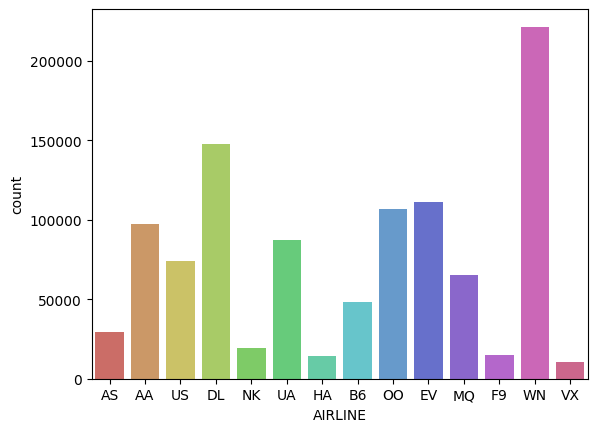

In [8]:
sns.countplot(x=df.AIRLINE,data=df,palette="hls")

In [9]:
dataset1.AIRLINE.value_counts()

AIRLINE
WN    221586
DL    147486
EV    111206
OO    107099
AA     97549
UA     87606
US     73942
MQ     65513
B6     48157
AS     29614
NK     19612
F9     14669
HA     14133
VX     10403
Name: count, dtype: int64

# FLIGHT_NUMBER
## The Flight Number is a unique identifier assigned to a specific flight by an airline. It typically consists of the airline's IATA code (a two-letter code) followed by a numeric code. For example, in the flight AA123 but on this data is just a number :

### AA represents American Airlines (the IATA airline code).
### 123 is the specific Flight Number for that airline.
## Key points about flight numbers:
### The flight number helps in identifying the exact flight's route, departure time, and sometimes the day it operates.
### Airlines may assign even numbers to eastbound or northbound flights and odd numbers to westbound or southbound flights, though this can vary.
### A flight number can also indicate the airline's codeshare agreement, meaning that the same flight might appear under multiple flight numbers with different airline codes.
### For example, a codeshare flight might have multiple flight numbers like DL1234 (Delta) and AF4567 (Air France) for the same physical flight.

In [10]:
dataset1.FLIGHT_NUMBER.value_counts()

FLIGHT_NUMBER
469     853
345     803
61      749
711     737
745     734
       ... 
5886      1
6623      1
5881      1
5766      1
5882      1
Name: count, Length: 6522, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\160196137.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.FLIGHT_NUMBER,data=df,palette="hls")


<Axes: xlabel='FLIGHT_NUMBER', ylabel='count'>

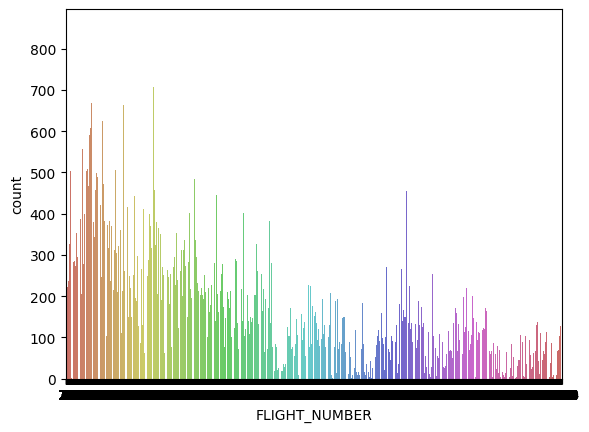

In [11]:
sns.countplot(x=df.FLIGHT_NUMBER,data=df,palette="hls")

# TAIL_NUMBER
## The Tail Number (also known as the Registration Number) is a unique alphanumeric code assigned to an individual aircraft, much like a license plate for cars. It is typically displayed on the tail of the aircraft, hence the name "tail number."

## Key points about Tail Numbers:
## Aircraft Identification:

### The tail number is used to uniquely identify each aircraft worldwide, regardless of the airline or type of aircraft.
### It stays with the aircraft for its lifetime, even if ownership changes.
## Format:

### Tail numbers are issued by a country’s aviation authority and start with a prefix identifying the country of registration.
### N12345: A U.S. registered aircraft (prefix N indicates the USA).
### G-ABCD: A UK registered aircraft (prefix G indicates the UK).
### VH-XYZ: An Australian registered aircraft (prefix VH indicates Australia).
### After the country prefix, the rest of the number or combination of letters is the specific identifier for that aircraft within that country.
## Usage:

### The tail number is used by aviation authorities for registration, tracking aircraft maintenance, and legal ownership.
### Air Traffic Control (ATC) often uses tail numbers to communicate with private aircraft or smaller planes, though commercial airlines primarily use flight numbers for communication.
## Airline vs. Private Aircraft:

### While flight numbers change with every flight and are used mainly for commercial airline operations, the tail number is fixed for the life of the aircraft and is used for tracking and regulatory purposes.

In [12]:
dataset1.TAIL_NUMBER.value_counts()

TAIL_NUMBER
N477HA    809
N488HA    799
N476HA    773
N485HA    767
N486HA    741
         ... 
N1200K      1
N173DZ      1
N829MH      1
N7LHAA      1
N154DL      1
Name: count, Length: 4522, dtype: int64

## ORIGIN_AIRPORT 

## The ORIGIN_AIRPORT refers to the airport where a flight begins or departs from. It is the starting point of a scheduled flight route.

## Key points about ORIGIN_AIRPORT:
### **Departure Location**: The ORIGIN_AIRPORT is the airport where passengers board the plane, and the flight starts its journey.
### **Airport Code**: The airport is usually identified by its three-letter IATA airport code (e.g., JFK for John F. Kennedy International Airport in New York, LAX for Los Angeles International Airport).
### **Flight Data**: In flight records and data sets, ORIGIN_AIRPORT is used to distinguish the starting airport of a particular flight, paired with the DESTINATION_AIRPORT, which is where the flight lands.
## For example:

### If a flight is going from Los Angeles International Airport (LAX) to John F. Kennedy International Airport (JFK), the ORIGIN_AIRPORT is LAX, and the DESTINATION_AIRPORT is JFK.

In [13]:
dataset1.ORIGIN_AIRPORT.value_counts()

ORIGIN_AIRPORT
ATL    66599
ORD    52961
DFW    50933
LAX    38473
DEN    38254
       ...  
UST       33
BGR       22
PPG       21
ADK       20
ITH        6
Name: count, Length: 315, dtype: int64

# DESTINATION_AIRPORT
## is the last stop of the plan in the flight 

In [14]:
dataset1.DESTINATION_AIRPORT.value_counts()

DESTINATION_AIRPORT
ATL    66741
ORD    53060
DFW    51037
LAX    38463
DEN    38300
       ...  
UST       33
BGR       22
PPG       21
ADK       20
ITH        6
Name: count, Length: 315, dtype: int64

# SCHEDULED_DEPARTURE
## The SCHEDULED_DEPARTURE refers to the planned or expected time at which a flight is scheduled to depart from its origin airport. This time is set by the airline and is listed in flight schedules, tickets, and departure boards.

## Key Points about SCHEDULED_DEPARTURE:
## Planned Time:

### It is the time the airline intends for the flight to leave the airport based on its schedule. This is used for planning, passenger information, and operational purposes.
## Format:

### Typically represented in 24-hour format (e.g., 14:30 for 2:30 PM) or 12-hour format with AM/PM.
### It includes the date and time of departure.
## Difference from Actual Departure:

### The SCHEDULED_DEPARTURE may differ from the ACTUAL_DEPARTURE time, which is the real time the flight actually leaves the gate. Delays or early departures can affect the actual time.
## Uses:

### Flight Timetables: To inform passengers of the expected departure time.
### Baggage Handling: To coordinate when baggage should be moved.
### Air Traffic Control: For managing and scheduling air traffic.
### Airport Operations: To manage gate assignments and other logistical aspects.

In [15]:
dataset1.SCHEDULED_DEPARTURE.value_counts()

SCHEDULED_DEPARTURE
600     22041
700     15270
800     11028
900      7758
1000     7217
        ...  
300         1
440         1
230         1
158         1
23          1
Name: count, Length: 1236, dtype: int64

# DEPARTURE_TIME 
## this is the time that the plane will leave the airport
## and the format of the time is the same as SCHEDULED_DEPARTURE

In [16]:
dataset1.DEPARTURE_TIME.value_counts()

DEPARTURE_TIME
555.0    2704
556.0    2615
557.0    2490
558.0    2352
559.0    2203
         ... 
433.0       1
320.0       1
439.0       1
434.0       1
436.0       1
Name: count, Length: 1434, dtype: int64

# DEPARTURE_DELAY
## the delay that the plane toke to leave the airport
## on the data set the delay unit is the minutes and the (-) value mean the plane leave before the orginal time 

In [17]:
dataset1.DEPARTURE_DELAY.value_counts()

DEPARTURE_DELAY
-3.0       72665
-4.0       71543
-5.0       71256
-2.0       69169
-1.0       62807
           ...  
 1340.0        1
 629.0         1
 699.0         1
 546.0         1
 1557.0        1
Name: count, Length: 861, dtype: int64

# TAXI_OUT
## In the flight industry, TAXI_OUT refers to the process and time it takes for an aircraft to move from the gate or parking position to the runway for takeoff. It includes all the movements and actions required for the aircraft to reach the runway, such as:

## Departure Preparation:

### This includes final preparations for takeoff, such as checking systems, ensuring all doors are closed, and performing safety checks.
## Taxiing:

### The aircraft moves from its parking position to the runway. This involves navigating through taxiways, sometimes following air traffic control instructions to reach the appropriate runway.
## Clearing Runway:

### The time taken to clear any obstructions or other aircraft from the runway before takeoff.
## Key Points:
### TAXI_OUT Time: This is typically recorded as part of flight operations data and is crucial for understanding the efficiency of airport operations, including how quickly aircraft can get from the gate to the runway.

### Flight Data Tracking: For tracking purposes, TAXI_OUT is recorded to monitor delays and improve the scheduling and management of aircraft movements at airports.

### Operational Efficiency: Efficient taxiing reduces overall turnaround time and improves airport capacity.

In [18]:
dataset1.TAXI_OUT.value_counts()

TAXI_OUT
12.0     79806
11.0     79046
13.0     76348
10.0     73221
14.0     69858
         ...  
176.0        1
154.0        1
169.0        1
170.0        1
158.0        1
Name: count, Length: 179, dtype: int64

# WHEELS_OFF
## WHEELS_OFF refers to the exact moment when an aircraft's wheels leave the ground during takeoff. It marks the point when the plane is no longer in contact with the runway and is officially airborne.

## Key Points about WHEELS_OFF:
## Takeoff Moment:

### This is the time when the aircraft lifts off from the runway and transitions into the air. It’s a critical phase in the flight and is precisely recorded in flight data systems.
## Flight Data:

### Airlines and air traffic control record the WHEELS_OFF time to monitor flight performance and track schedules. It helps in understanding the efficiency of takeoff operations, delays, or early departures.
## Relation to Other Events:

### TAXI_OUT: Happens before WHEELS_OFF, during which the plane moves from the gate to the runway.
### WHEELS_ON: The counterpart to WHEELS_OFF, which refers to when the aircraft’s wheels touch down on the runway at the destination.


In [19]:
dataset1.WHEELS_OFF.value_counts()

WHEELS_OFF
610.0    1524
608.0    1471
611.0    1457
609.0    1454
709.0    1417
         ... 
456.0       1
449.0       1
445.0       1
309.0       1
325.0       1
Name: count, Length: 1433, dtype: int64

# SCHEDULED_TIME
## SCHEDULED_TIME refers to the total planned duration of a flight according to the airline’s schedule. It represents the difference between the SCHEDULED_DEPARTURE time and the SCHEDULED_ARRIVAL time.

## Key Points about SCHEDULED_TIME:
## Planned Flight Duration:

### SCHEDULED_TIME is the amount of time the airline expects the flight to take from departure to arrival, including all phases of the flight such as taxiing, takeoff, cruising, descent, and landing.
## Includes Ground Time:

### It typically includes the time the aircraft spends taxiing at both the departure and arrival airports (i.e., TAXI_OUT and TAXI_IN), not just the time spent in the air.
## Flight Schedules:

### Airlines use SCHEDULED_TIME to inform passengers of how long the flight is expected to take, helping with travel planning and airport operations.
## Comparison to Actual Time:

### After the flight, the ACTUAL_TIME (the real duration of the flight) is often compared to the SCHEDULED_TIME to determine if the flight was on time, early, or delayed.
## Example:
### If a flight's SCHEDULED_DEPARTURE is 10:00 AM and its SCHEDULED_ARRIVAL is 1:00 PM, the SCHEDULED_TIME is 3 hours.

In [20]:
dataset1.SCHEDULED_TIME.value_counts()

SCHEDULED_TIME
80.0     20447
85.0     18991
75.0     18945
90.0     17935
70.0     17518
         ...  
434.0        1
584.0        1
436.0        1
462.0        1
423.0        1
Name: count, Length: 460, dtype: int64

# ELAPSED_TIME
## ELAPSED_TIME refers to the actual time a flight took from departure to arrival. It is the real-time duration of the flight, including both the time spent in the air and on the ground (taxiing).

## Key Points about ELAPSED_TIME:
## Actual Flight Duration:

### ELAPSED_TIME is the total time from the moment the aircraft begins moving away from the gate for takeoff (including TAXI_OUT) until it arrives at the destination gate after landing (including TAXI_IN).
## Comparison to SCHEDULED_TIME:

### ELAPSED_TIME is often compared to the SCHEDULED_TIME to assess whether the flight was on time, delayed, or arrived early.
## Components:

### It includes all stages of the flight:
### TAXI_OUT: Time spent taxiing to the runway.
### WHEELS_OFF: Time in the air after takeoff.
### WHEELS_ON: Time when the plane lands.
### TAXI_IN: Time spent taxiing to the gate after landing.
### Useful for Analysis:

### Airlines and airports use ELAPSED_TIME to analyze the efficiency of operations, identify delays, and improve scheduling accuracy.
## Example:
### If a flight takes off at 10:00 AM and arrives at the gate at 1:30 PM, the ELAPSED_TIME is 3 hours and 30 minutes.

In [21]:
dataset1.ELAPSED_TIME.value_counts()

ELAPSED_TIME
81.0     8162
79.0     8064
80.0     8019
75.0     8014
77.0     7975
         ... 
595.0       1
641.0       1
699.0       1
713.0       1
625.0       1
Name: count, Length: 685, dtype: int64

# AIR_TIME 

## AIR_TIME refers to the actual time an aircraft spends in the air, from the moment its wheels leave the ground during takeoff (WHEELS_OFF) until they touch the ground again during landing (WHEELS_ON). It excludes the time spent taxiing on the ground before takeoff and after landing.

## Key Points about AIR_TIME:
## In-Flight Duration:

### AIR_TIME measures the actual time spent flying, from the moment the aircraft lifts off to when it touches down. It does not include time spent taxiing to or from the runway.
## Difference from ELAPSED_TIME:

### While ELAPSED_TIME includes the total time from gate to gate (taxiing and flying), AIR_TIME only includes the portion when the plane is airborne.
## Useful for Performance and Fuel Analysis:

### Airlines often use AIR_TIME to evaluate flight performance, fuel usage, and the efficiency of cruising speeds and routes.
## Components:

### WHEELS_OFF: Marks the start of AIR_TIME (when the plane leaves the ground).
### WHEELS_ON: Marks the end of AIR_TIME (when the plane touches down).
## Example:
### If a flight takes off at 10:15 AM and lands at 12:45 PM, the AIR_TIME would be 2 hours and 30 minutes, while the total ELAPSED_TIME might be longer, depending on how long the plane spent taxiing.

In [22]:
dataset1.AIR_TIME.value_counts()

AIR_TIME
59.0     8737
43.0     8681
57.0     8661
60.0     8611
62.0     8579
         ... 
555.0       1
564.0       1
684.0       1
583.0       1
687.0       1
Name: count, Length: 650, dtype: int64

# DISTANCE

## In aviation, DISTANCE refers to the total distance traveled by an aircraft during a flight, usually measured in nautical miles (NM), miles (mi), or kilometers (km), depending on the system used.

## Key Points about DISTANCE:
## Flight Path:

### DISTANCE represents the actual distance covered by the aircraft along its flight path, from the origin airport to the destination airport. This is usually the great-circle distance (the shortest distance between two points on a sphere) but may vary slightly depending on the specific flight route due to weather, air traffic, or other factors.
## Scheduled vs. Actual Distance:

### Airlines typically calculate a scheduled or estimated distance for flight planning, but the actual distance traveled may differ slightly due to route adjustments made by air traffic control or to avoid adverse conditions.
## Nautical Miles (NM):

### Nautical miles are commonly used in aviation. 1 nautical mile equals 1.852 kilometers or 1.1508 miles.
## Example:
### A flight from New York (JFK) to Los Angeles (LAX) covers approximately 2,140 nautical miles (3,963 kilometers or 2,463 miles).
### Fuel Calculation and Flight Planning:

### The DISTANCE of a flight is a critical factor in flight planning for fuel requirements, time estimation, and crew scheduling.
## Example:
### A flight from San Francisco (SFO) to Tokyo (NRT) covers a distance of around 4,536 nautical miles (8,400 km or 5,220 miles).

In [23]:
dataset1.DISTANCE.value_counts()

DISTANCE
337     8681
2475    5046
404     4906
447     4819
594     4752
        ... 
88         1
107        1
101        1
1369       1
52         1
Name: count, Length: 1271, dtype: int64

# WHEELS_ON

## WHEELS_ON refers to the exact moment when an aircraft’s wheels touch the ground during landing. It marks the point when the aircraft transitions from flight back to ground operations.

## Key Points about WHEELS_ON:
## Landing Moment:

### WHEELS_ON is the moment the aircraft touches the runway after descending from the air. It is the opposite of WHEELS_OFF, which is when the aircraft leaves the ground during takeoff.
## Recorded for Flight Data:

### The WHEELS_ON time is recorded as part of the flight’s data to track performance metrics, such as total flight duration and landing time.
## Relation to ELAPSED_TIME and AIR_TIME:

### WHEELS_ON marks the end of the AIR_TIME (time the aircraft was in the air) and is used to calculate the ELAPSED_TIME (total time from departure to arrival).
## Operational Importance:

### It helps airlines and airports coordinate ground operations like gate assignments, baggage handling, and passenger disembarkation.
## Example:
### If a flight takes off at 10:00 AM (WHEELS_OFF) and lands at 12:30 PM (WHEELS_ON), the AIR_TIME would be 2 hours and 30 minutes.

In [24]:
dataset2.WHEELS_ON.value_counts()

WHEELS_ON
1636.0    1240
1630.0    1218
1805.0    1198
1634.0    1193
1635.0    1188
          ... 
346.0        4
352.0        4
259.0        4
355.0        4
403.0        2
Name: count, Length: 1440, dtype: int64

# TAXI_IN

## TAXI_IN refers to the time and process of an aircraft moving from the runway to its gate or parking position after landing. It includes the period from when the aircraft touches down (WHEELS_ON) to when it reaches the designated gate or parking area.

## Key Points about TAXI_IN:
## Post-Landing Movement:

### After landing, the aircraft exits the runway and travels along designated taxiways to its assigned gate or parking area.
## Clearing the Runway:

### During TAXI_IN, the aircraft must clear the runway quickly to make way for other arriving or departing flights.
## Operational Process:

### The TAXI_IN phase includes communication with ground control to ensure the aircraft follows the correct route to the gate.
### Ground personnel may guide the aircraft into its parking position at the gate.
## Part of Total Flight Time:

### TAXI_IN is part of the total flight time but is separate from AIR_TIME. It’s recorded to help airlines track the efficiency of ground operations.
## Passenger Experience:

### TAXI_IN can be a short or long process depending on airport congestion, gate availability, and the size of the airport.
## Example:
### A flight lands at 12:30 PM (WHEELS_ON) and reaches its gate at 12:40 PM, making the TAXI_IN time 10 minutes.

In [25]:
dataset2.TAXI_IN.value_counts(dropna=False)

TAXI_IN
4.0      165417
5.0      165181
6.0      131451
7.0       97616
3.0       93335
          ...  
177.0         1
180.0         1
154.0         1
197.0         1
168.0         1
Name: count, Length: 180, dtype: int64

# SCHEDULED_ARRIVAL

## SCHEDULED_ARRIVAL refers to the planned or expected time that a flight is scheduled to arrive at its destination airport. This is set by the airline and is used in flight schedules, tickets, and for airport operations to manage gate assignments and passenger logistics.

## Key Points about SCHEDULED_ARRIVAL:
## Planned Arrival Time:

### It is the time the airline expects the aircraft to arrive at the gate of the destination airport. This time is calculated based on flight duration, including taxiing and potential delays.
## Displayed to Passengers:

### The SCHEDULED_ARRIVAL time is displayed on passengers' tickets and on airport arrival boards to let them know when the flight is expected to reach the destination.
## Comparison to Actual Arrival:

### The SCHEDULED_ARRIVAL time is often compared to the ACTUAL_ARRIVAL time to determine whether the flight is on time, early, or delayed.
## Airline Operations:

### This time is important for coordinating airport operations such as gate availability, baggage handling, and crew scheduling.
## Example:
### If a flight is scheduled to depart at 10:00 AM and the SCHEDULED_ARRIVAL is 1:30 PM, the expected total flight duration (including taxiing) is 3 hours and 30 minutes.

In [26]:
dataset2.SCHEDULED_ARRIVAL.value_counts()

SCHEDULED_ARRIVAL
1030    3912
2100    3872
1905    3557
1815    3533
1210    3531
        ... 
247        1
404        1
259        1
302        1
426        1
Name: count, Length: 1353, dtype: int64

# ARRIVAL_TIME 
## ARRIVAL_TIME refers to the actual time when a flight reaches its destination gate or parking position. It is the official recorded time when the flight completes its journey and is used for determining on-time performance.

## Key Points about ARRIVAL_TIME:
## Gate Arrival:

### ARRIVAL_TIME is recorded when the aircraft reaches its designated gate or parking spot and the brakes are set.
### It marks the end of the flight for both passengers and crew.
## Not Always the Same as Landing Time:

### ARRIVAL_TIME differs from WHEELS_ON (landing time), as it includes the TAXI_IN period after landing. The aircraft may still take some time to reach the gate after touching down.
## Used for On-Time Performance:

### Airlines and airports track ARRIVAL_TIME to measure whether a flight is early, on time, or delayed.
### On-time arrival is typically defined by airlines as arriving within 15 minutes of the scheduled time.
## Displayed to Passengers:

### This time is typically communicated to passengers once the plane is at the gate, allowing them to disembark.
## Example:
### If a flight was scheduled to arrive at 3:00 PM but reached its gate at 3:05 PM, the ARRIVAL_TIME is 3:05 PM, meaning the flight was 5 minutes late.

In [27]:
dataset2.ARRIVAL_TIME.value_counts()

ARRIVAL_TIME
1645.0    1262
1652.0    1243
1642.0    1225
1639.0    1207
1644.0    1198
          ... 
407.0        4
401.0        4
329.0        3
355.0        2
357.0        1
Name: count, Length: 1440, dtype: int64

# ARRIVAL_DELAY
## ARRIVAL_DELAY refers to the difference between the SCHEDULED_ARRIVAL time and the ACTUAL_ARRIVAL time of a flight. It indicates how late (or early) a flight arrives at its destination compared to its planned schedule.

## Key Points about ARRIVAL_DELAY:
## Positive vs. Negative Values:

### A positive value indicates a delay, meaning the flight arrived later than the scheduled time.
### A negative value indicates the flight arrived earlier than the scheduled time.
### A zero value means the flight arrived exactly on time.
## Calculation:

### ARRIVAL_DELAY is calculated as: **ARRIVAL_DELAY** = **ACTUAL_ARRIVAL** − **SCHEDULED_ARRIVAL**
### **ARRIVAL_DELAY=ACTUAL_ARRIVAL−SCHEDULED_ARRIVAL**
### For example, if a flight is scheduled to arrive at 2:00 PM but arrives at 2:20 PM, the ARRIVAL_DELAY is 20 minutes.
## Factors Contributing to Delay:

### Weather conditions
### Air traffic control delays
### Late departure from the origin
### Taxiing delays after landing
## Passenger Impact:

### Passengers might miss connecting flights or experience other travel disruptions if the ARRIVAL_DELAY is significant.
## On-Time Performance:

### Airlines and airports use ARRIVAL_DELAY data to measure their on-time performance and address operational issues.
## Example:
### A flight was scheduled to arrive at 5:00 PM but reaches the gate at 5:30 PM. The ARRIVAL_DELAY is 30 minutes (positive value), meaning the flight was 30 minutes late.

In [28]:
dataset2.ARRIVAL_DELAY.value_counts()

ARRIVAL_DELAY
-8.0       28186
-7.0       28139
-9.0       28046
-6.0       27940
-10.0      27414
           ...  
 839.0         1
 1371.0        1
 772.0         1
 733.0         1
 1554.0        1
Name: count, Length: 883, dtype: int64

# DIVERTED
## In aviation, DIVERTED refers to a situation where a flight does not land at its intended destination and is rerouted to a different airport, usually due to unforeseen circumstances. These circumstances can include weather issues, mechanical problems, air traffic control directives, or emergencies.

## Key Points about DIVERTED:
## Unplanned Change of Destination:

### When a flight is marked as DIVERTED, it means the aircraft was forced to land at an alternate airport instead of the original destination.
## Common Reasons for Diversions:

### Weather conditions: Thunderstorms, fog, or other adverse weather at the destination airport.
### Mechanical issues: Problems with the aircraft that require an emergency or precautionary landing.
### Medical emergencies: If a passenger or crew member requires urgent medical attention.
### Congestion or delays: Air traffic control may redirect flights to reduce congestion or handle other issues at the destination airport.
### Fuel considerations: Running low on fuel due to delays or holding patterns.
### Operational Impacts:After a diversion, the airline must reroute passengers, often arranging alternate flights or ground transportation to the original destination.
## Recorded in Flight Data:

### DIVERTED is typically recorded in flight data as a binary (Yes/No) value to indicate whether the flight reached its intended destination.
## Example:
### A flight from New York (JFK) to Los Angeles (LAX) may be DIVERTED to Las Vegas (LAS) due to severe weather in Los Angeles, forcing the aircraft to land in Las Vegas temporarily.

In [29]:
dataset2.DIVERTED.value_counts()

DIVERTED
0    1046031
1       2544
Name: count, dtype: int64

# CANCELLED
## the number of the cancelled flight 

In [30]:
dataset2.CANCELLED.value_counts()

CANCELLED
0    1008048
1      40527
Name: count, dtype: int64

# CANCELLATION_REASON 


## What is CANCELLATION_REASON?
**CANCELLATION_REASON** refers to the reason why a flight was canceled. In the aviation industry, cancellations can occur for various reasons, and these reasons are typically coded for reporting and operational purposes.

### Key Points about CANCELLATION_REASON:
1. **Why Flights Are Canceled**:
   - Cancellations occur due to a variety of operational, environmental, or technical issues.

2. **Coded for Reporting**:
   - Airlines and regulatory authorities use standardized codes to classify cancellation reasons, which helps in monitoring and reporting flight cancellations.

## Common CANCELLATION_REASON Codes:

| **Code** | **Meaning**                                               |
|----------|------------------------------------------------------------|
| **A**    | **Airline/Carrier Issues**: Problems with the airline, such as crew unavailability, aircraft maintenance, or operational issues. |
| **B**    | **Weather**: Adverse weather conditions, such as storms, snow, or fog, which make flying unsafe. |
| **C**    | **National Air System**: Issues related to air traffic control, airport operations, or other national system-related delays. |
| **D**    | **Security**: Security-related issues, including airport closures, threats, or other emergencies impacting safety. |

## Explanation of Codes:
- **A (Airline/Carrier Issues)**: This includes any internal problems with the airline, such as mechanical failures, maintenance delays, or crew shortages. It's the airline's responsibility to resolve these issues.

- **B (Weather)**: When weather conditions like heavy snow, thunderstorms, or high winds make flying unsafe, flights may be canceled.

- **C (National Air System)**: This involves broader airspace management issues, such as air traffic control system failures, airport runway closures, or congestion.

- **D (Security)**: Cancellations due to security threats, terrorist alerts, or other safety-related emergencies that prevent the safe operation of flights.

## Example:
If a flight was canceled due to a snowstorm, the **CANCELLATION_REASON** code would be **B** (Weather). If the same flight were canceled because the crew was unavailable, the code would be **A** (Airline/Carrier Issues).



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\3935649392.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.CANCELLATION_REASON,data=df,palette="hls")


<Axes: xlabel='CANCELLATION_REASON', ylabel='count'>

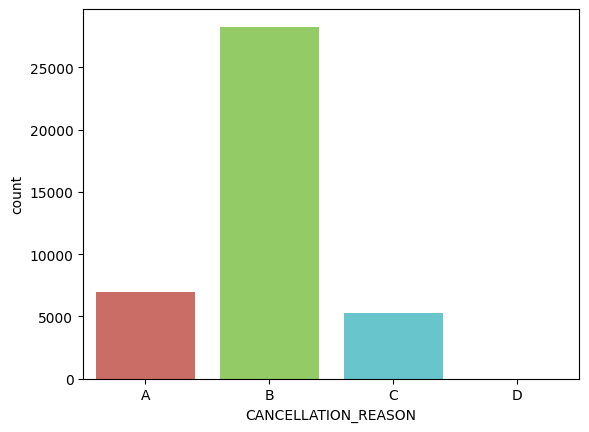

In [31]:
sns.countplot(x=df.CANCELLATION_REASON,data=df,palette="hls")

In [32]:
dataset2.CANCELLATION_REASON.value_counts()

CANCELLATION_REASON
B    28260
A     6974
C     5291
D        2
Name: count, dtype: int64

# AIR_SYSTEM_DELAY
 **AIR_SYSTEM_DELAY** refers to delays that occur due to issues related to the national airspace system. This encompasses a variety of factors that impact flight schedules and operations beyond the control of the airline.

## Key Points about AIR_SYSTEM_DELAY:
## Definition:

AIR_SYSTEM_DELAY is a classification for delays caused by air traffic control (ATC) or national airspace management, impacting the flow of air traffic.
## Common Causes:

Air Traffic Control Delays: Congestion or restrictions in air traffic management that prevent timely departures or arrivals.
Weather-Related Issues: Severe weather conditions affecting multiple flights or airports, leading to a ripple effect on air traffic.
Runway or Taxiway Congestion: High traffic volume at an airport causing delays in takeoff or landing.
Operational Restrictions: Restrictions imposed by ATC for safety, such as temporary flight path changes or ground delays.
## Impact on Flights:

AIR_SYSTEM_DELAY can lead to significant disruptions in flight schedules, affecting both passengers and airline operations. It can result in late departures and arrivals, missed connections, and increased travel times.
## Tracking and Reporting:

Airlines track AIR_SYSTEM_DELAY as part of their operational data to analyze performance, manage schedules, and report on punctuality metrics.
## Example:
If a flight scheduled to depart at 3:00 PM is delayed to 3:45 PM due to air traffic congestion in the area, this delay would be classified as an AIR_SYSTEM_DELAY.

In [33]:
dataset2.AIR_SYSTEM_DELAY.value_counts()

AIR_SYSTEM_DELAY
0.0      97394
1.0       5888
2.0       5275
15.0      5107
3.0       4995
         ...  
513.0        1
347.0        1
344.0        1
484.0        1
279.0        1
Name: count, Length: 395, dtype: int64

# SECURITY_DELAY

### SECURITY_DELAY refers to delays that occur due to security-related issues affecting a flight. These delays can arise from a variety of circumstances that necessitate enhanced safety measures before a flight can take off or land.

### Key Points about SECURITY_DELAY:
## Definition:

SECURITY_DELAY is classified as a delay resulting from security concerns that impact flight operations.
Common Causes:

**Threats or Alerts**: Warnings or alerts regarding potential security threats, requiring additional screening or precautions.
Increased Security Protocols: Implementation of heightened security measures, such as more thorough passenger and baggage screenings.
Evacuations: Situations where passengers or crew may need to evacuate due to security incidents at the airport or onboard.
Incident Response: Delays caused by responding to security incidents, such as suspicious packages or breaches.
## Impact on Flights:

SECURITY_DELAY can lead to longer wait times for passengers, missed connections, and potential disruptions in flight schedules. It affects both departing and arriving flights depending on the nature of the security issue.
## Tracking and Reporting:

Airlines and airports monitor SECURITY_DELAY as part of their operational data to assess the impact of security-related issues on flight punctuality and safety measures.
## Example:
If a flight scheduled to depart is delayed for 30 minutes due to a security alert that requires additional screening of passengers and baggage, this delay would be classified as a SECURITY_DELAY.

In [34]:
dataset2.SECURITY_DELAY.value_counts()

SECURITY_DELAY
0.0     227923
8.0         29
5.0         29
6.0         27
17.0        27
         ...  
73.0         1
91.0         1
99.0         1
96.0         1
88.0         1
Name: count, Length: 87, dtype: int64

# AIRLINE_DELAY

AIRLINE_DELAY refers to delays that occur due to issues specifically within the airline's control. This can include a variety of operational problems that affect the scheduling and execution of flights.

### Key Points about AIRLINE_DELAY:
### Definition:

AIRLINE_DELAY is classified as a delay resulting from factors related to the airline’s own operations.
## Common Causes:

Crew Availability: Delays caused by crew members not being available on time, often due to scheduling conflicts or late arrivals from previous flights.
**Mechanical Issues**: Problems with the aircraft that require maintenance or repairs before the flight can depart.
**Baggage Handling Delays**: Issues related to loading or unloading luggage that cause delays in departure.
**Gate Assignments**: Situations where the aircraft is delayed in reaching its assigned gate, impacting boarding processes.
**Operational Decisions**: Delays arising from the airline's decision-making, such as route adjustments or delays in passenger boarding.
## Impact on Flights:

AIRLINE_DELAY can lead to disruptions in flight schedules, affecting not only the delayed flight but also subsequent connections for passengers.
## Tracking and Reporting:

Airlines monitor AIRLINE_DELAY as part of their operational metrics to identify areas for improvement and enhance overall efficiency.
## Example:
If a flight is delayed for 45 minutes due to a mechanical issue that needs to be resolved before takeoff, this would be classified as an AIRLINE_DELAY.

In [35]:
dataset2.AIRLINE_DELAY.value_counts()

AIRLINE_DELAY
0.0       106289
1.0         4420
2.0         4318
4.0         4299
3.0         4295
           ...  
962.0          1
742.0          1
620.0          1
786.0          1
1554.0         1
Name: count, Length: 675, dtype: int64

# LATE_AIRCRAFT_DELAY

**LATE_AIRCRAFT_DELAY** refers to a delay caused by the late arrival of the aircraft assigned to the next flight. Essentially, the aircraft scheduled to operate a particular flight arrives late from its previous flight, causing a delay in the departure of the current flight.

### Key Points about LATE_AIRCRAFT_DELAY:
Delayed Turnaround:

Aircraft are often scheduled for back-to-back flights. If a plane arrives late from a previous flight, the next flight may be delayed due to the time needed for refueling, cleaning, passenger boarding, or addressing any maintenance issues.
## Chain Reaction:

This delay can have a cascading effect if the aircraft is used for multiple flights throughout the day, potentially causing delays for subsequent flights.
## Common Causes:

Weather conditions, air traffic control delays, mechanical issues, or longer-than-expected taxi times on the previous flight.
## Recorded for Analysis:

Airlines track LATE_AIRCRAFT_DELAY as part of their performance metrics. It helps airlines and airports identify operational inefficiencies and work on improving scheduling.
## Passenger Impact:

When this type of delay occurs, passengers are typically informed that the flight is delayed due to the late arrival of the aircraft from its previous destination.
## Example:
A flight from New York (JFK) to Chicago (ORD) is delayed by 45 minutes because the aircraft arriving from Miami (MIA), which is scheduled to operate the flight to Chicago, was delayed by thunderstorms.

In [36]:
dataset2.LATE_AIRCRAFT_DELAY.value_counts()

LATE_AIRCRAFT_DELAY
0.0      107600
15.0       3027
16.0       2925
17.0       2712
18.0       2599
          ...  
560.0         1
545.0         1
549.0         1
504.0         1
540.0         1
Name: count, Length: 510, dtype: int64

# WEATHER_DELAY 

**WEATHER_DELAY** refers to delays that occur due to adverse weather conditions impacting flight operations. This type of delay can affect takeoffs, landings, and overall air traffic flow.

## Key Points about WEATHER_DELAY:
## Definition:

WEATHER_DELAY is classified as a delay resulting from weather-related factors that make flying unsafe or impractical.
## Common Causes:

Severe Weather Conditions: Heavy rain, snow, thunderstorms, fog, or strong winds that restrict visibility or affect aircraft performance.
Icing Conditions: Cold weather leading to ice formation on runways, taxiways, or aircraft surfaces.
Airport Closures: Temporary closures of airports due to extreme weather, affecting all flights in and out of the facility.
Air Traffic Control Restrictions: Weather-related air traffic management decisions that limit the number of aircraft taking off or landing.
## Impact on Flights:

WEATHER_DELAY can lead to significant disruptions in flight schedules, affecting not only the delayed flights but also connecting flights for passengers.
## Tracking and Reporting:

Airlines and airports monitor WEATHER_DELAY as part of their operational data to assess the impact of weather on flight punctuality and to implement necessary safety measures.
## Example:
If a flight is scheduled to depart but is delayed for two hours due to heavy snowfall that reduces visibility at the airport, this delay would be classified as a WEATHER_DELAY.

In [37]:
dataset2.WEATHER_DELAY.value_counts()

WEATHER_DELAY
0.0      210490
6.0         536
8.0         531
7.0         507
10.0        495
          ...  
355.0         1
360.0         1
359.0         1
221.0         1
309.0         1
Name: count, Length: 466, dtype: int64

In [38]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   WHEELS_ON            1007279 non-null  float64
 1   TAXI_IN              1007279 non-null  float64
 2   SCHEDULED_ARRIVAL    1048575 non-null  int64  
 3   ARRIVAL_TIME         1007279 non-null  float64
 4   ARRIVAL_DELAY        1005504 non-null  float64
 5   DIVERTED             1048575 non-null  int64  
 6   CANCELLED            1048575 non-null  int64  
 7   CANCELLATION_REASON  40527 non-null    object 
 8   AIR_SYSTEM_DELAY     228528 non-null   float64
 9   SECURITY_DELAY       228528 non-null   float64
 10  AIRLINE_DELAY        228528 non-null   float64
 11  LATE_AIRCRAFT_DELAY  228528 non-null   float64
 12  WEATHER_DELAY        228528 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage: 104.0+ MB


In [39]:
df.head(30)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
dataset2.head(20)

,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
dataset1.head(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747


# **Data Clening**

## solving the missing value 

for this process ther some columns will not solve the missing value in it becuse it not useful for the AI model 

### the columns is 

1.AIRLINE

2.FLIGHT_NUMBER

3.TAIL_NUMBER

4.ORIGIN_AIRPORT

5.DESTINATION_AIRPORT

6.YEAR

7.MONTH

8.DAY
	
9.DAY_OF_WEEK

In [42]:
df=df.drop(['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','YEAR','MONTH','DAY','DAY_OF_WEEK'], axis=1)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 1   DEPARTURE_TIME       1009060 non-null  float64
 2   DEPARTURE_DELAY      1009060 non-null  float64
 3   TAXI_OUT             1008346 non-null  float64
 4   WHEELS_OFF           1008346 non-null  float64
 5   SCHEDULED_TIME       1048573 non-null  float64
 6   ELAPSED_TIME         1005504 non-null  float64
 7   AIR_TIME             1005504 non-null  float64
 8   DISTANCE             1048575 non-null  int64  
 9   WHEELS_ON            1007279 non-null  float64
 10  TAXI_IN              1007279 non-null  float64
 11  SCHEDULED_ARRIVAL    1048575 non-null  int64  
 12  ARRIVAL_TIME         1007279 non-null  float64
 13  ARRIVAL_DELAY        1005504 non-null  float64
 14  DIVERTED             1048575 non-null  int64  
 15

In [44]:
df.isnull().sum()

SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
dtype: int64

## once DEPARTURE_TIME mean the actual time at which a flight is set to leave the airport and take off.
### so on my opinion the best way to full the null value is to take the median of the value here becouse is a numaric value and it is the time on minits 

In [45]:
median_value = df['DEPARTURE_TIME'].median()
median_value

1329.0

In [46]:
df["DEPARTURE_TIME"].fillna(df["DEPARTURE_TIME"].median(),inplace=True,axis=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\2932453742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DEPARTURE_TIME"].fillna(df["DEPARTURE_TIME"].median(),inplace=True,axis=0)


<Axes: xlabel='DEPARTURE_TIME', ylabel='Count'>

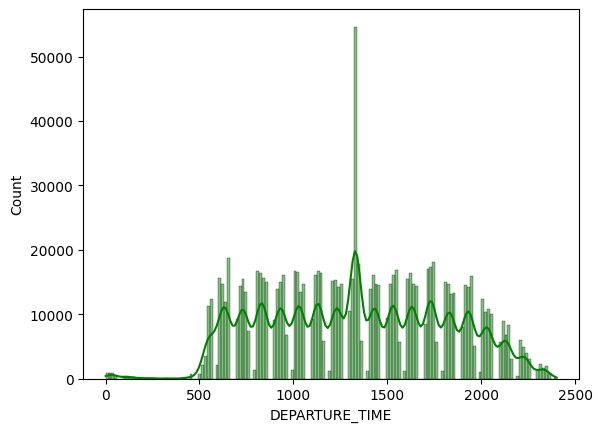

In [47]:
sns.histplot(data=df,x="DEPARTURE_TIME",kde=True,color='green')

## and for DEPARTURE_DELAY it have two possible value :
## 1. the null mean there is no delay 
## 2. the null is actully null and have no value 

### but i see that the null mean that is no delay so


# TAXI_OUT 
## same case as DEPARTURE_TIME

In [48]:
df["TAXI_OUT"].fillna(df["TAXI_OUT"].median(),inplace=True,axis=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\2914272557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TAXI_OUT"].fillna(df["TAXI_OUT"].median(),inplace=True,axis=0)


# WHEELS_OFF

In [49]:
df["WHEELS_OFF"].fillna(df["WHEELS_OFF"].median(),inplace=True,axis=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\346430459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["WHEELS_OFF"].fillna(df["WHEELS_OFF"].median(),inplace=True,axis=0)


# SCHEDULED_TIME

In [50]:
df["SCHEDULED_TIME"].fillna(df["SCHEDULED_TIME"].median(),inplace=True,axis=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\1933687444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SCHEDULED_TIME"].fillna(df["SCHEDULED_TIME"].median(),inplace=True,axis=0)


# ELAPSED_TIME

In [51]:
df["ELAPSED_TIME"].fillna(df["ELAPSED_TIME"].median(),inplace=True,axis=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\2880839006.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ELAPSED_TIME"].fillna(df["ELAPSED_TIME"].median(),inplace=True,axis=0)


# AIR_TIME

In [52]:
df["AIR_TIME"].fillna(df["AIR_TIME"].median(),inplace=True,axis=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\3748989187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AIR_TIME"].fillna(df["AIR_TIME"].median(),inplace=True,axis=0)


# WHEELS_ON

In [53]:
df["WHEELS_ON"].fillna(df["WHEELS_ON"].median(),inplace=True,axis=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\3950100794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["WHEELS_ON"].fillna(df["WHEELS_ON"].median(),inplace=True,axis=0)


# TAXI_IN 

In [54]:
df["TAXI_IN"].fillna(df["TAXI_IN"].median(),inplace=True,axis=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\1569455364.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TAXI_IN"].fillna(df["TAXI_IN"].median(),inplace=True,axis=0)


# ARRIVAL_TIME 

In [55]:
df["ARRIVAL_TIME"].fillna(df["ARRIVAL_TIME"].median(),inplace=True,axis=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\978593999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ARRIVAL_TIME"].fillna(df["ARRIVAL_TIME"].median(),inplace=True,axis=0)


# ARRIVAL_DELAY

In [56]:
df["ARRIVAL_DELAY"].fillna(0,inplace=True,axis=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\2897155556.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ARRIVAL_DELAY"].fillna(0,inplace=True,axis=0)


# CANCELLATION_REASON
### once the CANCELLATION_REASON is a string and need to be labeled the letter N will be the value of not cancelling the flights

In [57]:
df["CANCELLATION_REASON"].fillna("N",inplace=True,axis=0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_42884\729624203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CANCELLATION_REASON"].fillna("N",inplace=True,axis=0)


## and for the delay reason all the null value will be = 0

In [58]:
# this not working 
# df[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','LATE_AIRCRAFT_DELAY','DEPARTURE_DELAY']].fillna(0.0,inplace=True,axis=0)

In [59]:
for col in ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','LATE_AIRCRAFT_DELAY','DEPARTURE_DELAY','WEATHER_DELAY']:
    df[col] = df[col].fillna(0)

In [60]:
df.isnull().sum()

SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 1   DEPARTURE_TIME       1048575 non-null  float64
 2   DEPARTURE_DELAY      1048575 non-null  float64
 3   TAXI_OUT             1048575 non-null  float64
 4   WHEELS_OFF           1048575 non-null  float64
 5   SCHEDULED_TIME       1048575 non-null  float64
 6   ELAPSED_TIME         1048575 non-null  float64
 7   AIR_TIME             1048575 non-null  float64
 8   DISTANCE             1048575 non-null  int64  
 9   WHEELS_ON            1048575 non-null  float64
 10  TAXI_IN              1048575 non-null  float64
 11  SCHEDULED_ARRIVAL    1048575 non-null  int64  
 12  ARRIVAL_TIME         1048575 non-null  float64
 13  ARRIVAL_DELAY        1048575 non-null  float64
 14  DIVERTED             1048575 non-null  int64  
 15

In [62]:
dataset1.nunique()

YEAR                      1
MONTH                     3
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6522
TAIL_NUMBER            4522
ORIGIN_AIRPORT          315
DESTINATION_AIRPORT     315
SCHEDULED_DEPARTURE    1236
DEPARTURE_TIME         1434
DEPARTURE_DELAY         861
TAXI_OUT                179
WHEELS_OFF             1433
SCHEDULED_TIME          460
ELAPSED_TIME            685
AIR_TIME                650
DISTANCE               1271
dtype: int64

In [63]:
dataset2.nunique()

WHEELS_ON              1440
TAXI_IN                 179
SCHEDULED_ARRIVAL      1353
ARRIVAL_TIME           1440
ARRIVAL_DELAY           883
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        395
SECURITY_DELAY           87
AIRLINE_DELAY           675
LATE_AIRCRAFT_DELAY     510
WEATHER_DELAY           466
dtype: int64

In [64]:
Labelencoder=LabelEncoder()

def encoder(data):
    for col in data.columns:
        if data[col].dtype == 'object':  # Check if the column type is object (string)
            data[col] = Labelencoder.fit_transform(data[col])
encoder(df)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 1   DEPARTURE_TIME       1048575 non-null  float64
 2   DEPARTURE_DELAY      1048575 non-null  float64
 3   TAXI_OUT             1048575 non-null  float64
 4   WHEELS_OFF           1048575 non-null  float64
 5   SCHEDULED_TIME       1048575 non-null  float64
 6   ELAPSED_TIME         1048575 non-null  float64
 7   AIR_TIME             1048575 non-null  float64
 8   DISTANCE             1048575 non-null  int64  
 9   WHEELS_ON            1048575 non-null  float64
 10  TAXI_IN              1048575 non-null  float64
 11  SCHEDULED_ARRIVAL    1048575 non-null  int64  
 12  ARRIVAL_TIME         1048575 non-null  float64
 13  ARRIVAL_DELAY        1048575 non-null  float64
 14  DIVERTED             1048575 non-null  int64  
 15

In [66]:
df.columns


Index(['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

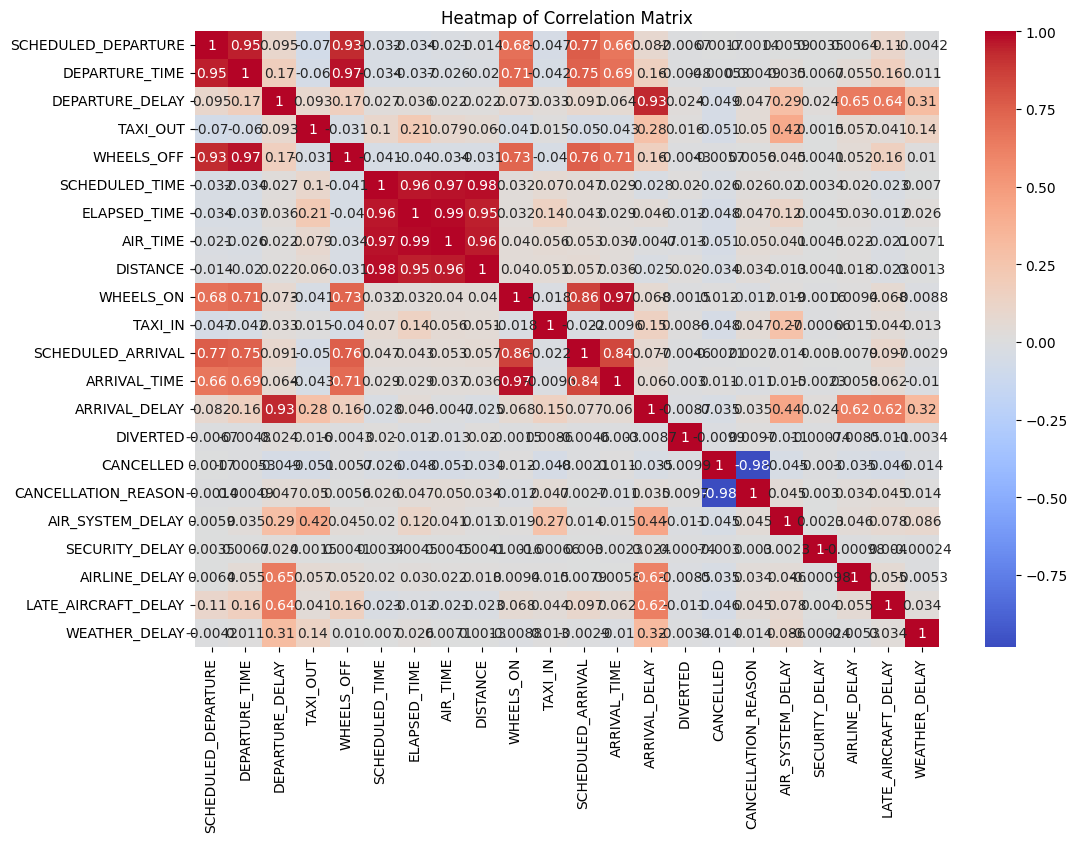

In [67]:


# Assuming df is your DataFrame with 30 columns and 1048575 rows
# For the example, let's generate a sample DataFrame
# Uncomment the next line if you already have your df
# df = pd.read_csv('your_data.csv')

# Move DataFrame to a PyTorch tensor on the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert the DataFrame to a PyTorch tensor (float32 is usually sufficient)
data_tensor = torch.tensor(df.values, dtype=torch.float32).to(device)

# Compute the correlation matrix on the GPU
# Note: The correlation is across columns, so we transpose the data to get (columns, rows)
correlation_matrix = torch.corrcoef(data_tensor.T)

# Move the result back to the CPU for plotting
correlation_matrix_cpu = correlation_matrix.cpu().numpy()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_cpu, annot=True, cmap='coolwarm', xticklabels=df.columns, yticklabels=df.columns)
plt.title("Heatmap of Correlation Matrix")
plt.show()


# Outliers Of The Data
## the most of outliers on this data came from the columns that connect with a delay and the reson of that is the most value on those columns is a 0 so is no delay but when a delay happen the boxplot see that as outlier but it is not  

In [84]:
df.columns

Index(['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [88]:

columns_of_interest = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

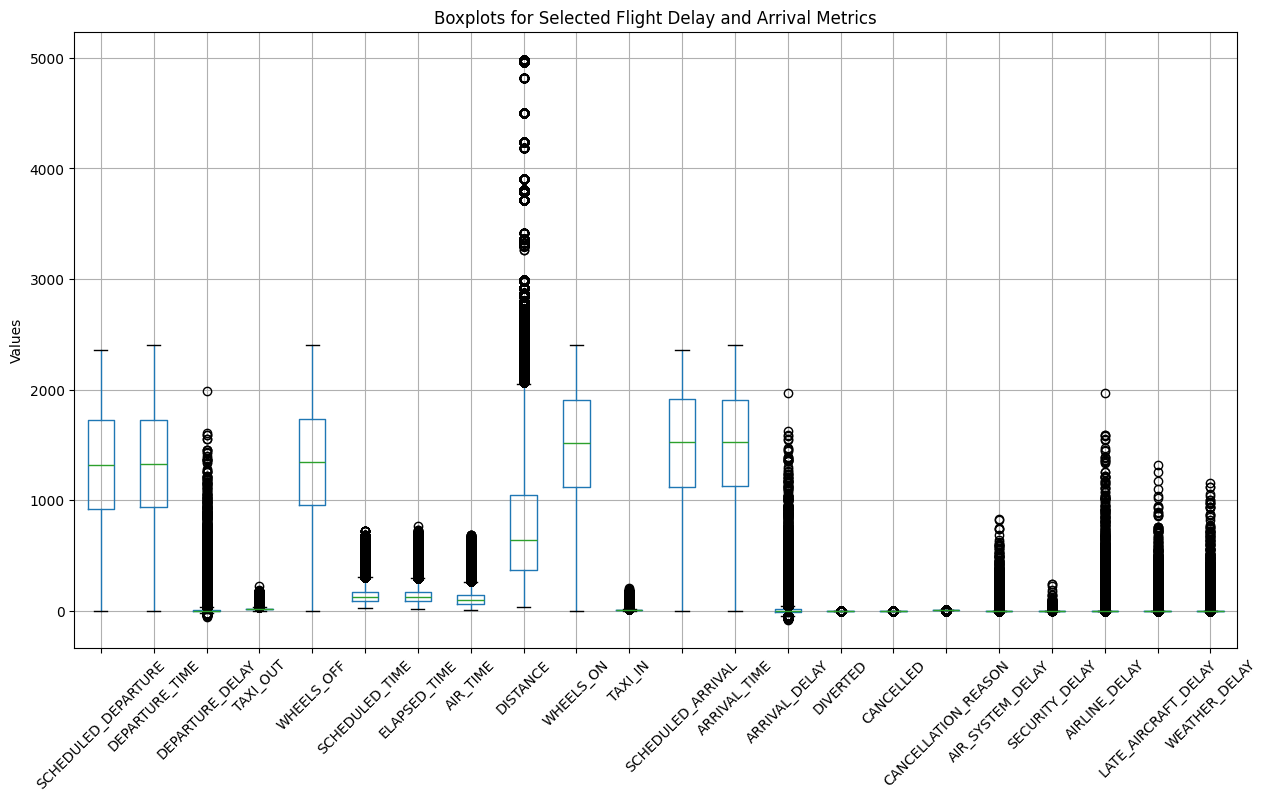

In [90]:
plt.figure(figsize=(15, 8))
df[columns_of_interest].boxplot()
plt.title('Boxplots for Selected Flight Delay and Arrival Metrics')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.show()

# Multi-Task Learning Model with PyTorch

This code implements a multi-task learning model using PyTorch to predict both classification and regression outputs from flight data. The model consists of a shared neural network structure that branches into two separate outputs: one for classification and another for regression.

## Overview

1. **Data Preparation**
   - The dataset is loaded into a Pandas DataFrame and features are defined.
   - The categorical column `CANCELLATION_REASON` is one-hot encoded for classification.
   - Continuous columns for delays are prepared for regression tasks.
   - The input features are scaled using `StandardScaler`.

2. **Device Setup**
   - The model will utilize GPU if available, ensuring faster computations during training.

3. **Model Definition**
   - A class `MultiTaskModel` is created, extending `nn.Module`.
   - The model contains:
     - Two shared dense layers.
     - A classification layer using softmax activation for multi-class outputs.
     - A regression layer for continuous outputs.

4. **Loss Functions and Optimizer**
   - Cross-Entropy Loss is used for the classification task.
   - Mean Squared Error (MSE) is used for the regression task.
   - Adam optimizer is employed for model training.

5. **Training Loop**
   - The model is trained for a specified number of epochs.
   - Each epoch includes a forward pass, loss calculation, backward pass, and optimization.
   - Average losses are recorded for both classification and regression tasks.
   - Model accuracy and mean absolute error (MAE) are computed on the test set.

6. **Visualization**
   - The training losses and test metrics (accuracy and MAE) are plotted using Matplotlib to visualize the model's performance over epochs.

## Code Breakdown

### 1. Imports and Data Preparation
```python
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assume df is your DataFrame
X = df[['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'TAXI_OUT', 'WHEELS_OFF', 
        'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 
        'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 
        'DIVERTED', 'CANCELLED']]

y_class = df[['CANCELLATION_REASON']]
y_regress = df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
                'LATE_AIRCRAFT_DELAY', 'DEPARTURE_DELAY', 'WEATHER_DELAY']]

# OneHotEncode the 'CANCELLATION_REASON'
onehot = OneHotEncoder(sparse_output=False)  
y_class_encoded = onehot.fit_transform(df[['CANCELLATION_REASON']])

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
y_class_tensor = torch.tensor(y_class_encoded, dtype=torch.float32).to(device)
y_regress_tensor = torch.tensor(y_regress.values, dtype=torch.float32).to(device)

# Split the data into training and testing sets
X_train, X_test, y_class_train, y_class_test, y_regress_train, y_regress_test = train_test_split(
    X_tensor, y_class_tensor, y_regress_tensor, test_size=0.2, random_state=42)

# Define the model
class MultiTaskModel(nn.Module):
    def __init__(self, input_dim, num_classes, num_regression_targets):
        super(MultiTaskModel, self).__init__()
        self.shared_layer1 = nn.Linear(input_dim, 128)
        self.shared_layer2 = nn.Linear(128, 64)

        # Classification branch
        self.classification_layer = nn.Linear(64, num_classes)

        # Regression branch
        self.regression_layer = nn.Linear(64, num_regression_targets)

    def forward(self, x):
        x = torch.relu(self.shared_layer1(x))
        x = torch.relu(self.shared_layer2(x))

        class_output = torch.softmax(self.classification_layer(x), dim=1)
        regress_output = self.regression_layer(x)  # Linear output for regression

        return class_output, regress_output

# Instantiate the model
input_dim = X_scaled.shape[1]
num_classes = y_class_encoded.shape[1]
num_regression_targets = y_regress.shape[1]

model = MultiTaskModel(input_dim, num_classes, num_regression_targets).to(device)

# Define loss functions and optimizer
classification_loss_fn = nn.CrossEntropyLoss()  # Cross-entropy for classification
regression_loss_fn = nn.MSELoss()  # MSE for regression

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
batch_size = 32
num_batches = len(X_train) // batch_size

for epoch in range(epochs):
    model.train()  # Set the model to training mode
    epoch_class_loss = 0
    epoch_regress_loss = 0

    for i in range(num_batches):
        # Get the current batch
        start = i * batch_size
        end = start + batch_size

        X_batch = X_train[start:end]
        y_class_batch = y_class_train[start:end]
        y_regress_batch = y_regress_train[start:end]

        # Forward pass
        class_pred, regress_pred = model(X_batch)

        # Calculate losses
        class_loss = classification_loss_fn(class_pred, y_class_batch.argmax(dim=1))
        regress_loss = regression_loss_fn(regress_pred, y_regress_batch)

        # Combine the losses
        total_loss = class_loss + regress_loss

        # Backward pass and optimization
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        epoch_class_loss += class_loss.item()
        epoch_regress_loss += regress_loss.item()

    print(f'Epoch {epoch + 1}/{epochs}, Classification Loss: {epoch_class_loss/num_batches:.4f}, '
          f'Regression Loss: {epoch_regress_loss/num_batches:.4f}')

# Evaluation on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    class_pred_test, regress_pred_test = model(X_test)

    # Classification accuracy
    correct_class = (class_pred_test.argmax(dim=1) == y_class_test.argmax(dim=1)).sum().item()
    total_class = y_class_test.size(0)
    accuracy = correct_class / total_class
    print(f'Classification Accuracy: {accuracy * 100:.2f}%')

    # Regression mean absolute error (MAE)
    mae = torch.mean(torch.abs(regress_pred_test - y_regress_test), dim=0)
    print(f'Regression MAE: {mae.cpu().numpy()}')


Using device: cuda
Epoch 1/50, Classification Loss: 0.9198, Regression Loss: 121.8356
Epoch 2/50, Classification Loss: 0.9166, Regression Loss: 113.8139
Epoch 3/50, Classification Loss: 0.9167, Regression Loss: 111.9429
Epoch 4/50, Classification Loss: 0.9167, Regression Loss: 110.4540
Epoch 5/50, Classification Loss: 0.9166, Regression Loss: 109.5450
Epoch 6/50, Classification Loss: 0.9167, Regression Loss: 108.9197
Epoch 7/50, Classification Loss: 0.9167, Regression Loss: 108.3778
Epoch 8/50, Classification Loss: 0.9167, Regression Loss: 107.9183
Epoch 9/50, Classification Loss: 0.9166, Regression Loss: 107.5186
Epoch 10/50, Classification Loss: 0.9167, Regression Loss: 107.2011
Epoch 11/50, Classification Loss: 0.9166, Regression Loss: 106.8572
Epoch 12/50, Classification Loss: 0.9168, Regression Loss: 106.6659
Epoch 13/50, Classification Loss: 0.9167, Regression Loss: 106.4516
Epoch 14/50, Classification Loss: 0.9167, Regression Loss: 106.3460
Epoch 15/50, Classification Loss: 0.91

# Multi-Task Learning Model with TensorFlow/Keras

This code implements a multi-task learning model using TensorFlow/Keras to predict both classification and regression outputs from flight data. The model consists of a shared neural network structure that branches into two outputs: one for classification and another for regression.

## Overview

1. **Data Preparation**
   - The dataset is loaded into a Pandas DataFrame and features are defined.
   - The categorical column `CANCELLATION_REASON` is one-hot encoded for classification.
   - Continuous columns for delays are prepared for regression tasks.
   - The input features are scaled using `StandardScaler`.

2. **Model Definition**
   - The model is defined using the Keras functional API, which allows for more complex architectures.
   - The model consists of:
     - An input layer that takes the scaled features.
     - Shared dense layers for feature extraction.
     - A classification output layer using softmax activation for multi-class outputs.
     - A regression output layer for continuous values.

3. **Loss Functions and Optimizer**
   - Categorical Cross-Entropy Loss is used for the classification task.
   - Mean Squared Error (MSE) is used for the regression task.
   - Adam optimizer is employed for model training.

4. **Training Process**
   - The dataset is split into training and testing sets.
   - The model is trained for a specified number of epochs, with validation split to monitor performance.
   - Training history is recorded.

5. **Evaluation**
   - The model is evaluated on the test set, and the evaluation results are printed.

## Code Breakdown

### 1. Imports and Data Preparation
```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define Features (X) and Targets (Y)
X = df[['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', ...]]  # Define feature columns
y_class = df[['CANCELLATION_REASON']]  # Define classification target
y_regress = df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', ...]]  # Define regression targets


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define Features (X) and Targets (Y)
X = df[['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'TAXI_OUT', 'WHEELS_OFF', 
        'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 
        'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 
        'DIVERTED', 'CANCELLED']]

# Only categorical column for classification is 'CANCELLATION_REASON'
y_class = df[['CANCELLATION_REASON']]

# All delay columns are treated as continuous (for regression)
y_regress = df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
                'LATE_AIRCRAFT_DELAY', 'DEPARTURE_DELAY', 'WEATHER_DELAY']]

# OneHotEncode the 'CANCELLATION_REASON'
onehot = OneHotEncoder(sparse_output=False)  
y_class_encoded = onehot.fit_transform(df[['CANCELLATION_REASON']])

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Input layer (based on feature size)
input_layer = Input(shape=(X_scaled.shape[1],))

# Shared layers
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)

# Classification output for 'CANCELLATION_REASON'
class_output = Dense(y_class_encoded.shape[1], activation='softmax', name='classification_output')(x)

# Regression output for delay columns
regress_output = Dense(len(y_regress.columns), activation='linear', name='regression_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=[class_output, regress_output])

# Compile the model
model.compile(optimizer='adam', 
              loss={'classification_output': 'categorical_crossentropy', 
                    'regression_output': 'mse'},  # MSE for regression
              metrics={'classification_output': 'accuracy', 
                       'regression_output': 'mae'})  # MAE for regression

# Model summary
model.summary()

# Split the data into training and testing sets
X_train, X_test, y_class_train, y_class_test, y_regress_train, y_regress_test = train_test_split(
    X_scaled, y_class_encoded, y_regress, test_size=0.2, random_state=42)

# Train the model
history = model.fit(
    X_train, 
    {'classification_output': y_class_train, 'regression_output': y_regress_train},
    epochs=50, 
    batch_size=32, 
    validation_split=0.2
)

# Evaluate the model
evaluation_results = model.evaluate(
    X_test, 
    {'classification_output': y_class_test, 'regression_output': y_regress_test}
)

print(evaluation_results)



Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │      2,048 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │      8,256 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classification_out… │ (None, 5)         │        325 │ dense_9[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression_output   │ (None, 6)         │        390 │ dense_9[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,019 (43.04 KB)

 Trainable params: 11,019 (43.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - classification_output_accuracy: 0.9839 - classification_output_loss: 0.0541 - loss: 142.6199 - regression_output_loss: 142.5657 - regression_output_mae: 3.0266 - val_classification_output_accuracy: 0.9880 - val_classification_output_loss: 0.0326 - val_loss: 113.8800 - val_regression_output_loss: 113.8571 - val_regression_output_mae: 2.3683
Epoch 2/50
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - classification_output_accuracy: 0.9883 - classification_output_loss: 0.0319 - loss: 111.7308 - regression_output_loss: 111.6992 - regression_output_mae: 2.3276 - val_classification_output_accuracy: 0.9880 - val_classification_output_loss: 0.0326 - val_loss: 110.4240 - val_regression_output_loss: 110.4001 - val_regression_output_mae: 2.3063
Epoch 3/50
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 21s 998us/step - classification_output_accuracy: 0.9884 - classification_output_loss: 0.0314 - loss: 115.5967 - regression_output_loss: 115.5652 - regress

# the end 
## on the end of this project that contane a flight data from some airline on this word 
**note** that i use chatGPt for Coordination and arrangement 